## Testing the technical indicators

In [1]:
# importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Add the project root directory to the Python path
sys.path.append(os.path.abspath(".."))

from technical_indicators import MACD

In [3]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
ohlcv_data = {}

In [4]:
for ticker in tickers:
    temp = yf.download(ticker, period='1mo', interval='15m')
    temp = temp[['Open', 'High', 'Low', 'Close', 'Volume']]
    temp.dropna(inplace=True)
    ohlcv_data[ticker] = temp
ohlcv_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AAPL': Price                            Open        High         Low       Close  \
 Ticker                           AAPL        AAPL        AAPL        AAPL   
 Datetime                                                                    
 2025-04-16 13:30:00+00:00  198.360001  200.699997  198.300003  198.929993   
 2025-04-16 13:45:00+00:00  198.945007  199.059998  196.300003  196.559998   
 2025-04-16 14:00:00+00:00  196.550003  197.440002  196.020004  196.300003   
 2025-04-16 14:15:00+00:00  196.320007  197.380005  196.210007  197.070007   
 2025-04-16 14:30:00+00:00  197.059998  198.440002  196.809998  198.169998   
 ...                               ...         ...         ...         ...   
 2025-05-15 18:45:00+00:00  211.059998  211.089996  210.490494  210.654999   
 2025-05-15 19:00:00+00:00  210.660004  211.089996  210.589996  210.729996   
 2025-05-15 19:15:00+00:00  210.729996  211.050003  210.324997  210.360001   
 2025-05-15 19:30:00+00:00  210.350006  210.710007  210.

In [5]:
# for ticker in tickers:
#     ohlcv_data[ticker]['MACD'], ohlcv_data[ticker]['Signal Line'] = MACD.implement_MACD(ohlcv_data[ticker])
# # Display the first few rows of the MACD data for each ticker
# for ticker in tickers:
#     print(f"MACD data for {ticker}:")
#     print(ohlcv_data[ticker][['MACD', 'Signal Line']].head())


In [6]:
# for ticker in tickers:
#     MACD.plot_macd(ohlcv_data[ticker], ticker)

In [ ]:
def ATR(df, period=14):
    """
    Calculate Average True Range (ATR)
    """
    df['High-Low'] = df['High'] - df['Low']
    df['High-Prev Close'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-Prev Close'] = abs(df['Low'] - df['Close'].shift(1))
    df['True Range'] = df[['High-Low', 'High-Prev Close', 'Low-Prev Close']].max(axis=1)
    atr = df['True Range'].rolling(window=period).mean()
    return atr

def ATR_plot(df, ticker, period=14):
    """
    Plot ATR
    """
    # df['ATR'] = ATR(df, period)
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['ATR'], label='ATR', color='blue')
    plt.title(f'Average True Range (ATR) for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('ATR')
    plt.legend()
    plt.grid()
    plt.show()


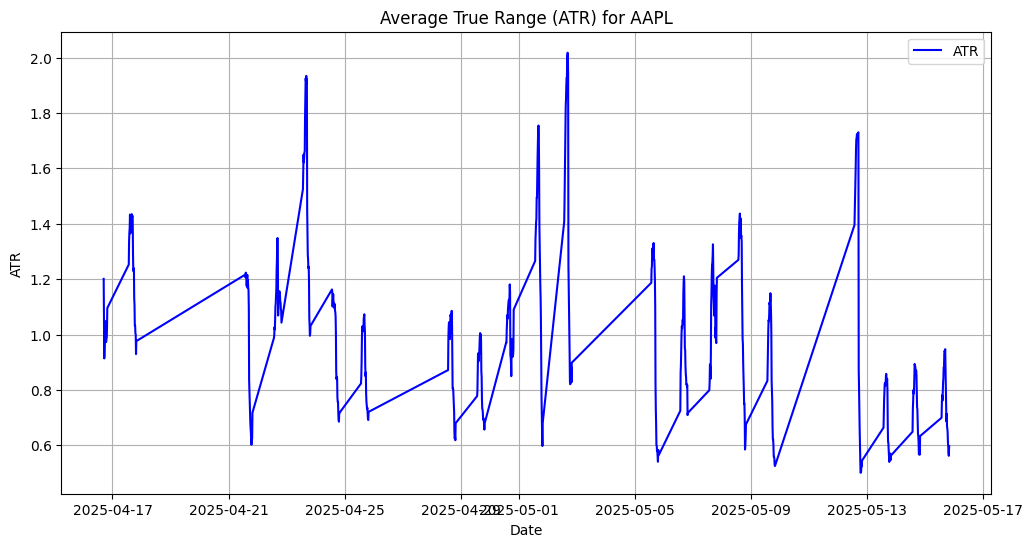

ATR data for AAPL:
Price                     ATR
Ticker                       
Datetime                     
2025-04-16 13:30:00+00:00 NaN
2025-04-16 13:45:00+00:00 NaN
2025-04-16 14:00:00+00:00 NaN
2025-04-16 14:15:00+00:00 NaN
2025-04-16 14:30:00+00:00 NaN


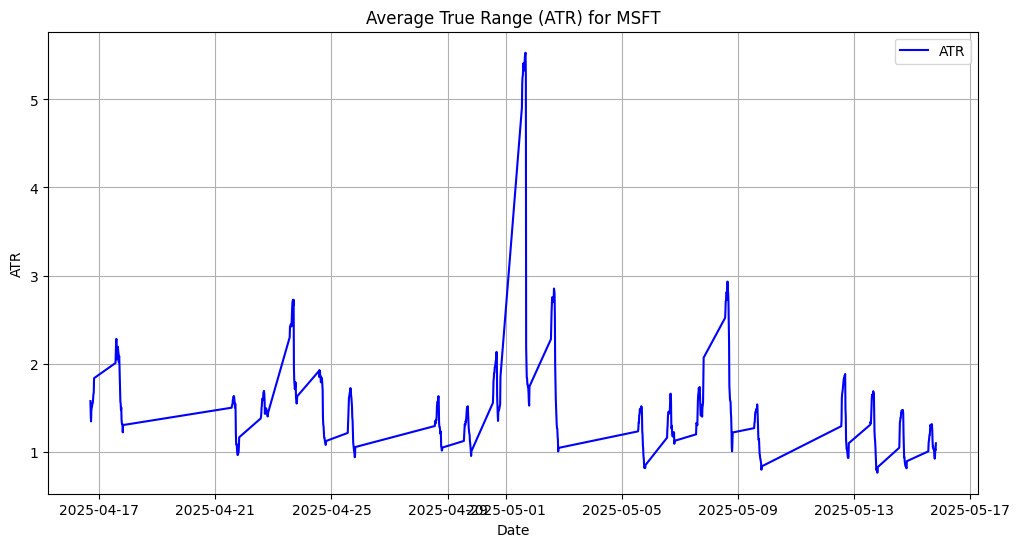

ATR data for MSFT:
Price                     ATR
Ticker                       
Datetime                     
2025-04-16 13:30:00+00:00 NaN
2025-04-16 13:45:00+00:00 NaN
2025-04-16 14:00:00+00:00 NaN
2025-04-16 14:15:00+00:00 NaN
2025-04-16 14:30:00+00:00 NaN


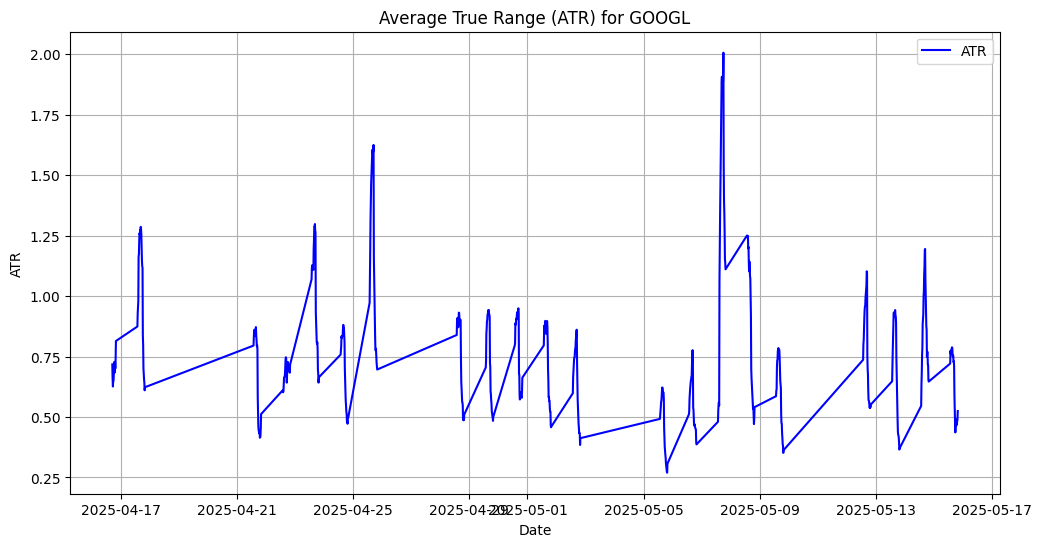

ATR data for GOOGL:
Price                     ATR
Ticker                       
Datetime                     
2025-04-16 13:30:00+00:00 NaN
2025-04-16 13:45:00+00:00 NaN
2025-04-16 14:00:00+00:00 NaN
2025-04-16 14:15:00+00:00 NaN
2025-04-16 14:30:00+00:00 NaN


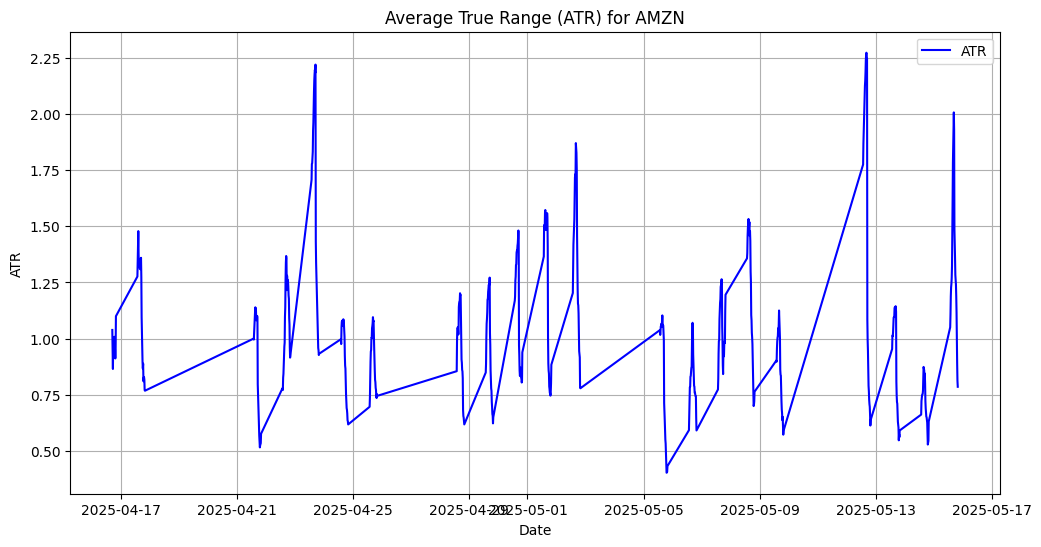

ATR data for AMZN:
Price                     ATR
Ticker                       
Datetime                     
2025-04-16 13:30:00+00:00 NaN
2025-04-16 13:45:00+00:00 NaN
2025-04-16 14:00:00+00:00 NaN
2025-04-16 14:15:00+00:00 NaN
2025-04-16 14:30:00+00:00 NaN


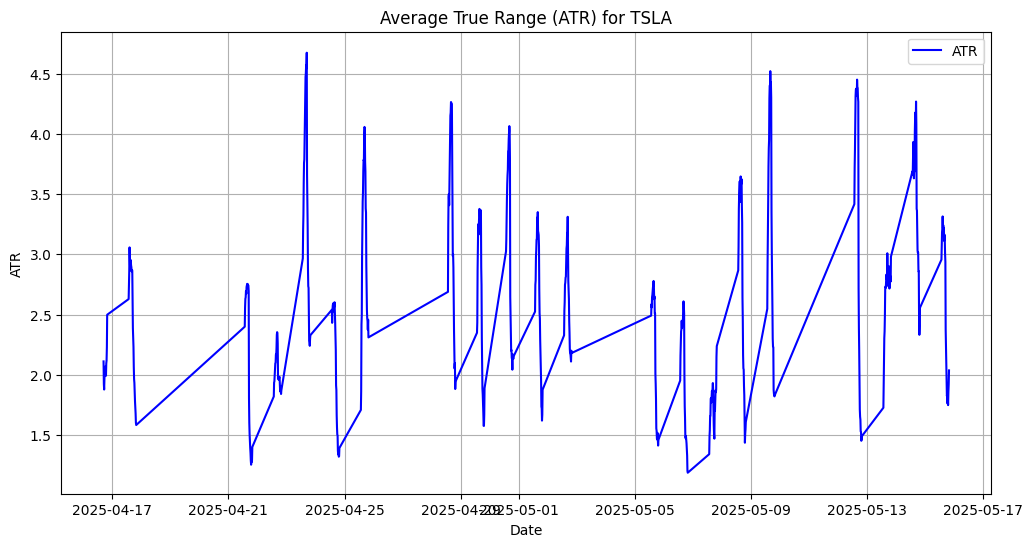

ATR data for TSLA:
Price                     ATR
Ticker                       
Datetime                     
2025-04-16 13:30:00+00:00 NaN
2025-04-16 13:45:00+00:00 NaN
2025-04-16 14:00:00+00:00 NaN
2025-04-16 14:15:00+00:00 NaN
2025-04-16 14:30:00+00:00 NaN


In [8]:
# Calculate and plot ATR for each ticker
for ticker in tickers:
    ATR_plot(ohlcv_data[ticker], ticker, period=14)
    print(f"ATR data for {ticker}:")
    print(ohlcv_data[ticker][['ATR']].head())
